In [1]:
import numpy as np
import pandas as pd 

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
from matplotlib import ticker as mtick
import seaborn as sns

sns.set_theme(style='whitegrid')
%matplotlib inline

Per prima cosa, importo il dataframe, e inizio a valutarne dimensioni, integrità e altre informazioni preliminari.
Siamo in presenza di date, quindi utilizzo l'argomento parse_dates.
La data di ordine è più indicativa rispetto a quella di spedizione.


In [2]:
df = pd.read_csv('Sample - Superstore.csv', encoding='windows-1252', parse_dates = ['Order Date', 'Ship Date'])

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df['Product Name'].describe()

count                9994
unique               1850
top       Staple envelope
freq                   48
Name: Product Name, dtype: object

In [6]:
inizio = df['Order Date'].min()
fine = df['Order Date'].max()
print(f"Il dataset copre un arco temporale di {(fine-inizio).days} giorni.")
print(f"In totale sono presenti {df['Product ID'].nunique()} articoli, che hanno generato un incasso di {df['Sales'].sum():.1f}€ ed un profitto di {df['Profit'].sum():.1f}€")
print(f"Sono presenti {len(df)} ordini, formati da {df['Product ID'].nunique()} articoli divisi in {df['Category'].nunique()} categorie e {df['Sub-Category'].nunique()} sottocategorie.")

Il dataset copre un arco temporale di 1457 giorni.
In totale sono presenti 1862 articoli, che hanno generato un incasso di 2297200.9€ ed un profitto di 286397.0€
Sono presenti 9994 ordini, formati da 1862 articoli divisi in 3 categorie e 17 sottocategorie.


In [7]:
df['Product Name'].value_counts()

Staple envelope                                                                        48
Staples                                                                                46
Easy-staple paper                                                                      46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Boston 1900 Electric Pencil Sharpener                                                   1
RCA ViSYS 25423RE1 Corded phone                                                         1
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner     1
Newell 342                                                                              1
Eldon Jumbo ProFile Portable File Boxes Graphite/Black                                  1
Name: Prod

Abbiamo più di 1850 articoli, un'analisi basata su di essi sarebbe troppo dispersiva. Diamo ora uno sguardo alle categories, e vediamo se sono di respiro un pochino più ampio.


In [8]:
df['Category'].describe()

count                9994
unique                  3
top       Office Supplies
freq                 6026
Name: Category, dtype: object

Iniziamo ad analizzare i profitti apportati da ciascuna categoria

In [9]:
MostProfit = df.groupby('Category')['Profit'].sum()
MostProfit

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

<AxesSubplot:title={'center':'Profitto per categorie'}, xlabel='Category'>

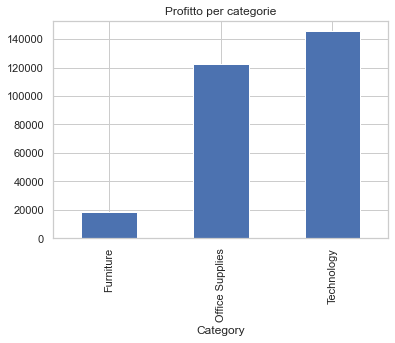

In [10]:
MostProfit.plot(kind= 'bar', title= 'Profitto per categorie')

Se per un semplice confronto tra categorie mi è bastato il metodo .plot di pandas, ora voglio fare un passo in più con pyplot.
Innanzitutto realizzo due grafici a torta (pie) che mi esplicitino il valore in dollari e la percentuale sul totale di incassi e profitti per ciascuna categoria. 

Text(0.5, 1.0, 'Profitti totali per Categoria')

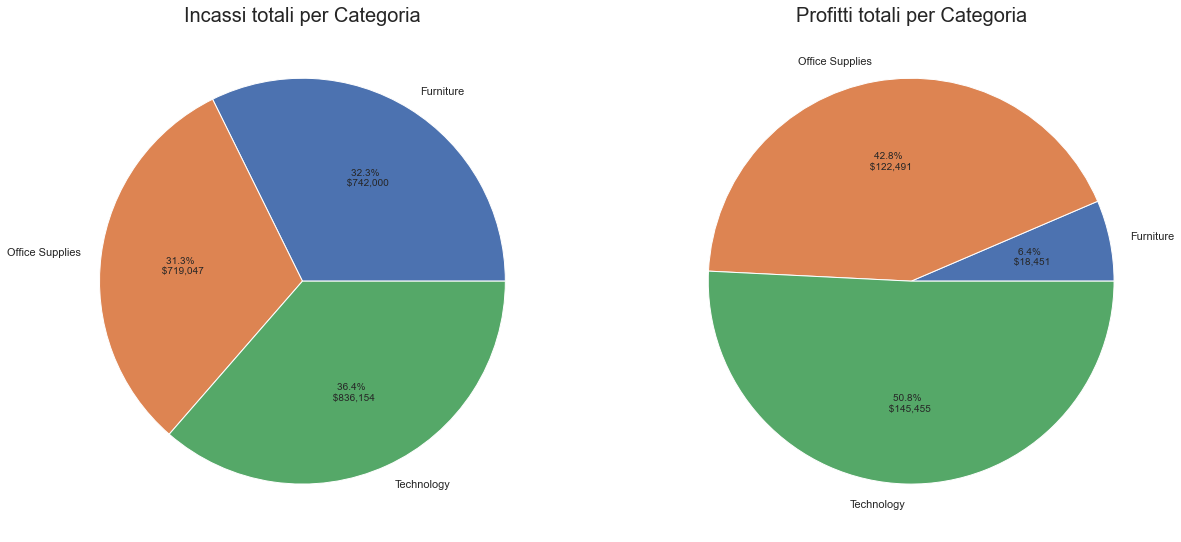

In [11]:
CatSales = df.groupby('Category').sum() 

fig, (pl1, pl2) = plt.subplots(figsize = (20, 20), ncols = 2)
pl1.pie(CatSales["Sales"], labels=CatSales.index,
      autopct= lambda p: f"{p:.1f}% \n ${p*np.sum(CatSales['Sales'])/100 :,.0f}")
pl1.set_title("Incassi totali per Categoria", fontdict={"fontsize":20})

pl2.pie(CatSales["Profit"], labels=CatSales.index,
       autopct= lambda p: f"{p:.1f}% \n ${p*np.sum(CatSales['Profit'])/100 :,.0f}")
pl2.set_title("Profitti totali per Categoria", fontdict={"fontsize":20})



Da questa prima coppia di grafici, si può notare quanto l'incasso per la categoria "Furniture" abbia un debolissimo impatto sul profitto.
Un' analisi più approfondita estesa anche alle sub-categories potrebbe aiutarci a fare maggiore chiarezza. 

Nelle analisi sulle vendite, è spesso utile definire il margine di profitto, ossia il quoziente profitto(profit) / fatturato(sales). Dopodichè procederò con la mia analisi comparativa sul margine di profitto tra le varie subcategorie

In [12]:
SubCatSales = df.groupby(["Category", "Sub-Category"],as_index=False)[["Sales", "Profit"]].sum()
SubCatSales['Profit Margin'] = SubCatSales['Profit']/SubCatSales['Sales']

SubCatSales.sort_values(by="Profit Margin", inplace=True, ascending=False)


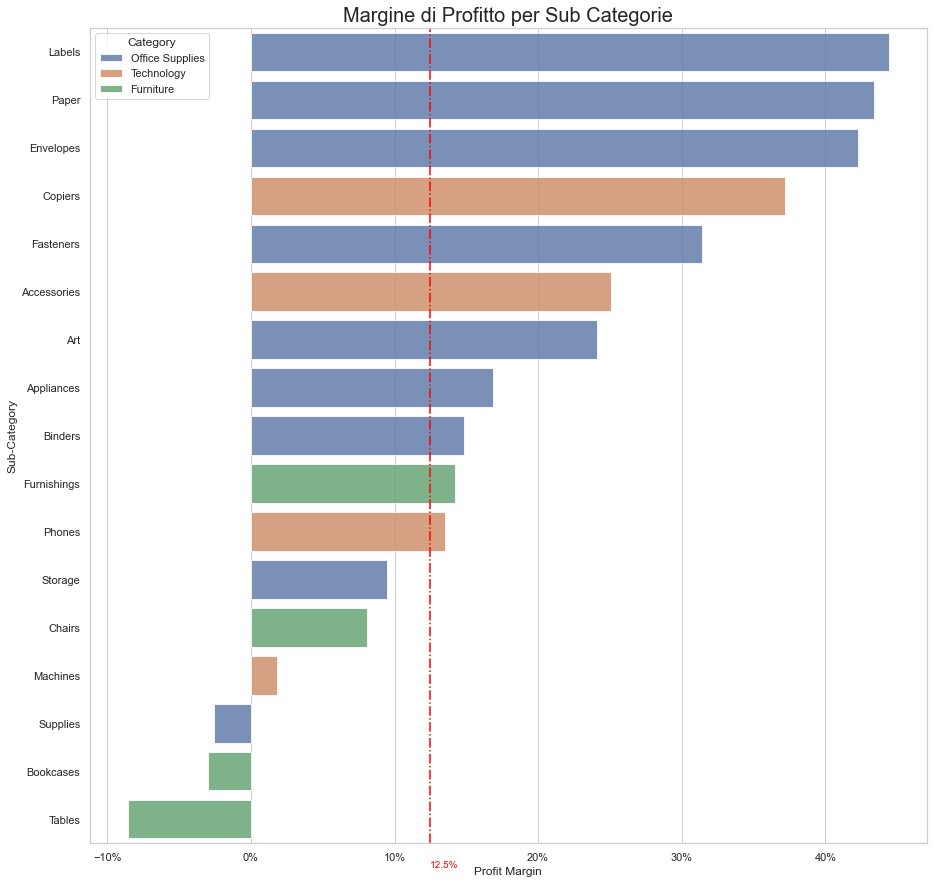

In [13]:
#inizio il plotting
fig, ax = plt.subplots(figsize=(15,15))
sns.barplot(y=SubCatSales["Sub-Category"], x=SubCatSales["Profit Margin"], hue=SubCatSales["Category"], 
          alpha=0.8, dodge=False,
           ax=ax)
ax.set_title("Margine di Profitto per Sub Categorie" , fontdict={"fontsize":20})

# aggiungo anche una linea tratteggiata che confronti il margine di profitto delle sub-cat con quello medio aziendale

MeanProfit = SubCatSales["Profit"].sum() / SubCatSales["Sales"].sum()

ax.axvline(MeanProfit, color="red", ls="dashdot")
ax.text(x=MeanProfit, y=len(SubCatSales), s=f"{MeanProfit*100 :.1f}%", color="red")

#formatto l'asse x in percentuali per una migliore lettura
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))


Ci sono 3 sub-categorie che operano in perdita: Supplies, Bookcases e Tables. Altre informazioni utili possono derivarci dall'analisi dei segmenti produttivi.

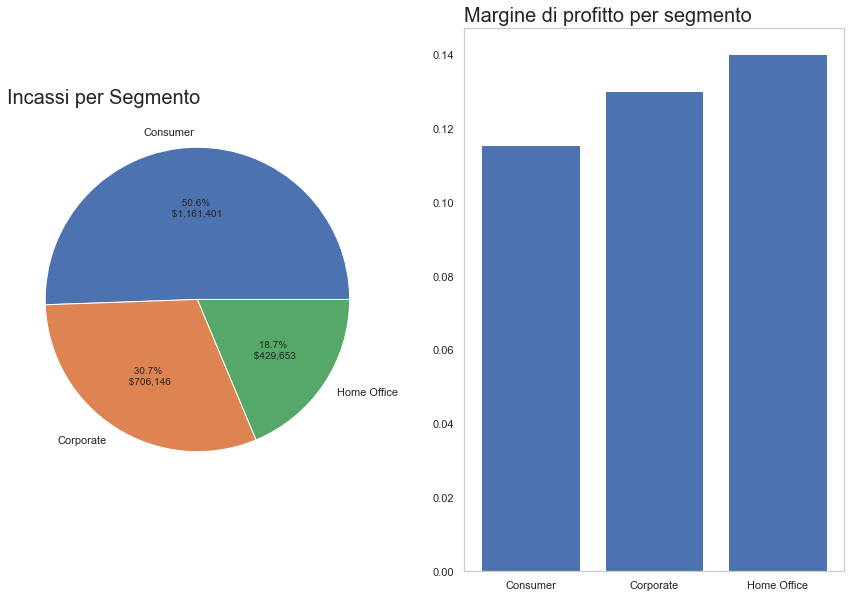

In [14]:
SegSales= df.groupby("Segment").sum()

fig, (ax1, ax2) = plt.subplots(figsize=(15,10), ncols=2)
ax1.pie(SegSales["Sales"], labels=SegSales.index, autopct=lambda p: f"{p: .1f}% \n ${p*np.sum(SegSales['Sales'])/100 :,.0f}")
ax1.set_title("Incassi per Segmento", fontdict={"fontsize":20}, loc="left")

SegSales["Profitmargin"] = SegSales["Profit"] / SegSales["Sales"]
SegSales = SegSales[["Quantity", "Profit", "Profitmargin"]].reset_index()

ax2.bar(x=SegSales["Segment"], height=SegSales["Profitmargin"])
ax2.set_title("Margine di profitto per segmento", fontdict={"fontsize":20}, loc="left")
ax2.grid(b=None)


Il segmento "consumer" genera più incassi della somma di Corporate e Home office, tuttavia a livello di margine di profitto, possiamo osservare come consumer in realtà sia il segmento che presenta quello più basso.

Passiamo ora ad analizzare le città. Per prima cosa voglio estrapolare i dati sulle 25 città in cui si registrano i maggiori volumi di vendita

In [15]:
CityCount= df['City'].value_counts()
CityCount = CityCount.sort_values(ascending = False) 
CityCount.head(25)

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          115
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Arlington         60
San Antonio       59
Miami             57
Louisville        57
Rochester         53
Name: City, dtype: int64

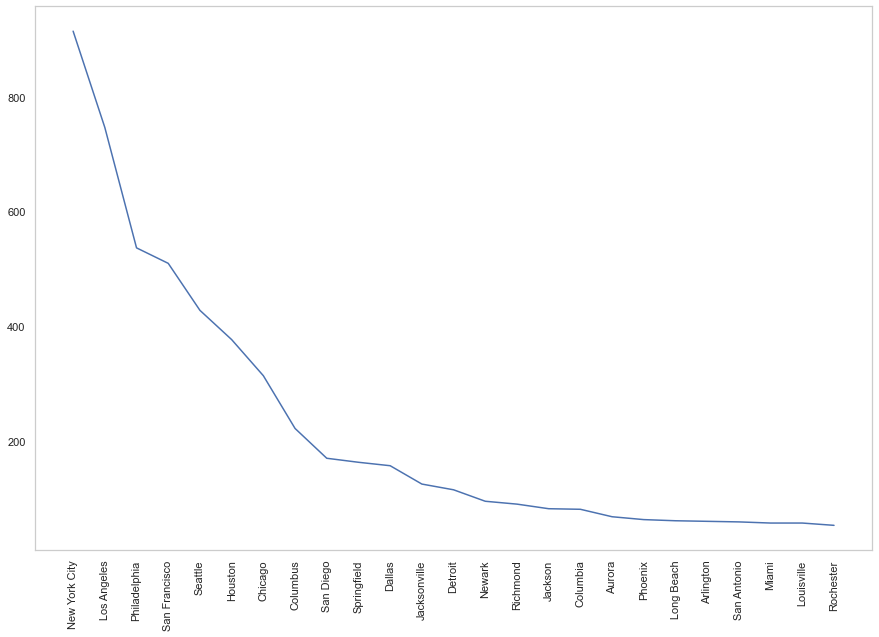

In [16]:
plt.figure(figsize=(15, 10))
plt.plot(CityCount.head(25))
plt.xticks(rotation=90)
plt.grid(b=None)
plt.show()

Siamo in presenza di stagionalità per quanto riguarda le date di ordine in relazione al fatturato e al profitto?

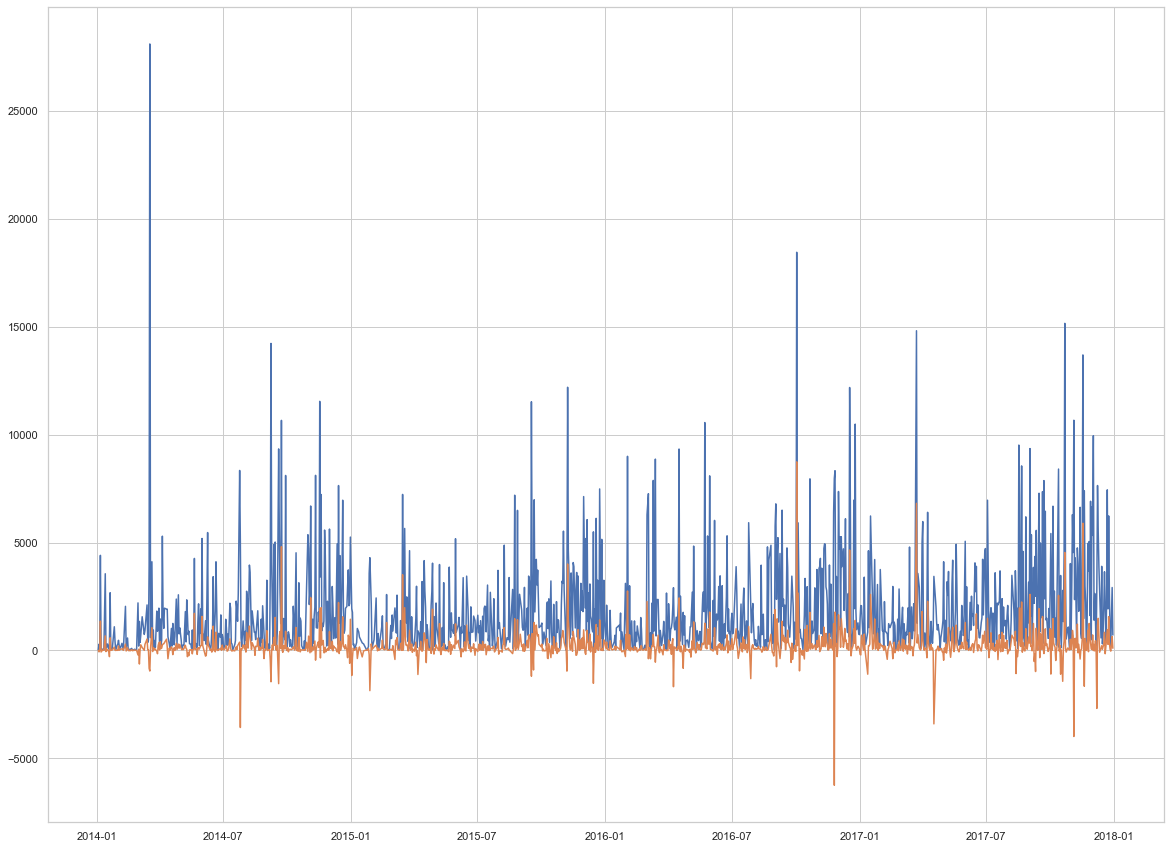

In [17]:
stag = df.groupby('Order Date').sum()
stag = stag.drop(['Row ID','Postal Code', 'Quantity', 'Discount'], axis=1)
plt.figure(figsize=(20, 15))
plt.plot(stag)
plt.show()


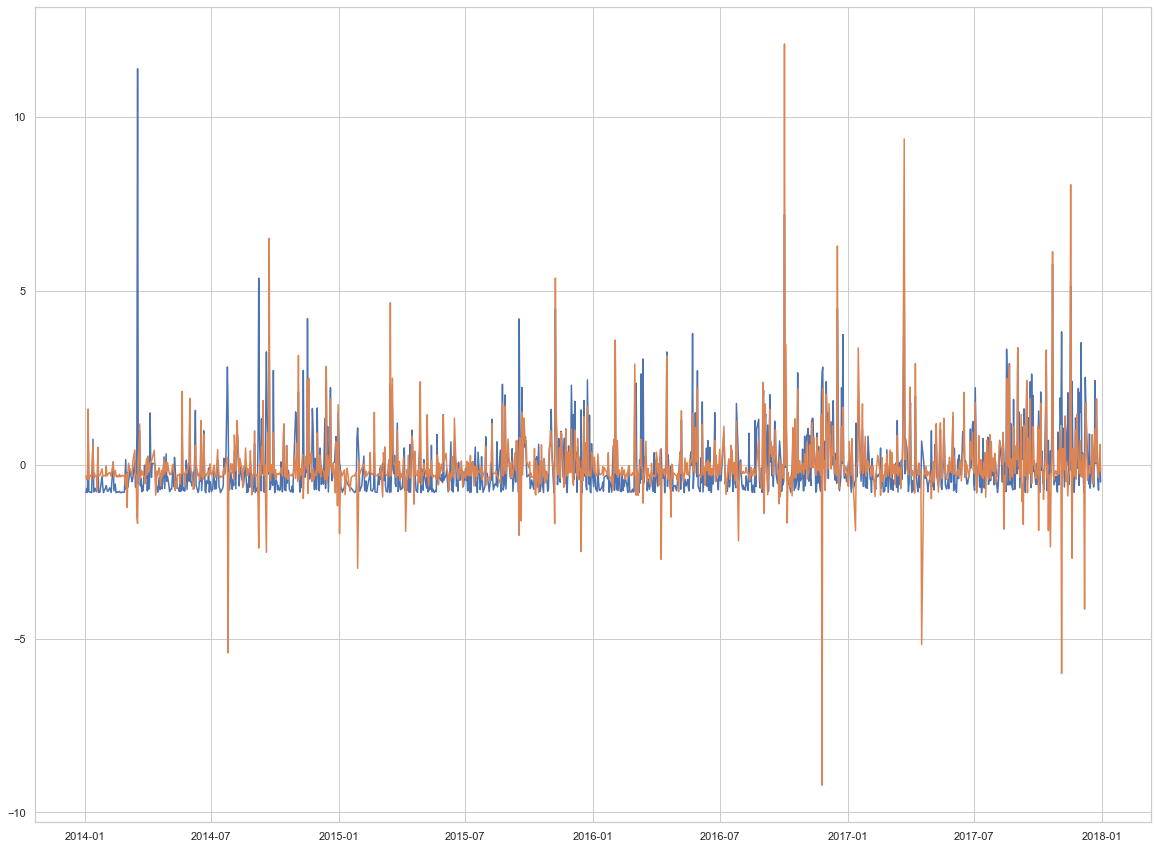

In [18]:
plt.figure(figsize=(20, 15))
scaler= StandardScaler()
StandardSales = scaler.fit_transform(stag)
StandardSalesDF= pd.DataFrame(StandardSales, index= stag.index.values, columns= ['Sales', 'Profit'])
plt.plot(StandardSalesDF)
plt.show()


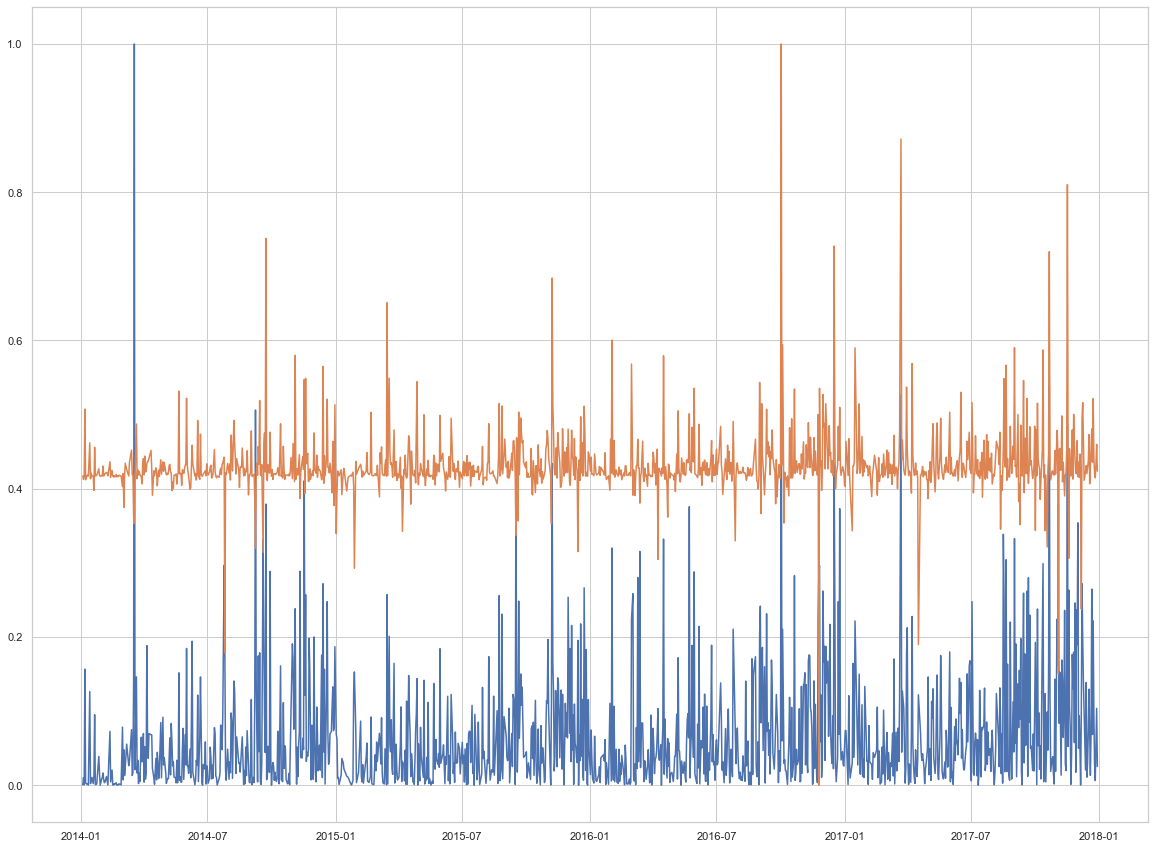

In [19]:
plt.figure(figsize=(20, 15))
mscaler= MinMaxScaler()
MinMaxSales = mscaler.fit_transform(stag)
MinMaxSalesDF= pd.DataFrame(MinMaxSales, index= stag.index.values, columns= ['Sales', 'Profit'])
plt.plot(MinMaxSalesDF)

plt.show()

Eseguendo anche diversi tipi di scaling, non emergono dei pattern netti che rivelino forti stagionalità. Possiamo solo osservare dei picchi di vendite occasionali .

Possiamo passare adesso all'implementazione di alcuni algoritmi predittivi. Voglio riuscire ad ottenere una previsione affidabile sul prezzo di vendita (sales) date le altre features. 

In [20]:
def InputCopy(df):  
    df = df.copy()
    return df
stag

,Sales,Profit
Order Date,,
2014-01-03,16.4480,5.5512
2014-01-04,288.0600,-65.9901
2014-01-05,19.5360,4.8840
2014-01-06,4407.1000,1358.0524
2014-01-07,87.1580,-71.9621
...,...,...
2017-12-26,814.5940,61.1202
2017-12-27,177.6360,-31.9742
2017-12-28,1657.3508,253.1188


In [21]:
X = InputCopy(df)      ## Logicamente, non voglio lavorare sul df originario, ma sulla copia X

Adesso, voglio rimuovere le colonne che presentano dati di tipo stringa per le quali non è possibile fare qualche tipo di encoding, e quelle che non hanno valore informativo per un fine previsionale perchè troppo numerose


In [22]:
print("Valori unici per colonna:")
for col in X.columns:
    print (col, ':', len(X[col].unique()))  

Valori unici per colonna:
Row ID : 9994
Order ID : 5009
Order Date : 1237
Ship Date : 1334
Ship Mode : 4
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
City : 531
State : 49
Postal Code : 631
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1850
Sales : 5825
Quantity : 14
Discount : 12
Profit : 7287


In [23]:
X= X.drop(['Row ID','City', 'Customer Name', 'Country', 'Product Name', 'Order ID', 'Customer ID','Product ID', 'Order Date', 'Ship Date', 'Postal Code'], axis = 1)

Se le opzioni di spedizione sono poche, posso eseguirne un ordinal encoding ordinandole per la loro velocità

In [24]:
X['Ship Mode'].unique() 

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

Sono poche, posso procedere

In [25]:
oe = OrdinalEncoder(categories= [['Standard Class','Second Class','First Class', 'Same Day']])
ship = oe.fit_transform(X[['Ship Mode']])

X['Ship Mode'] = ship

In [26]:
X = pd.get_dummies(data=X, columns=['Segment','Category', 'Region', 'Sub-Category', 'State'])
X

,Ship Mode,Sales,Quantity,Discount,Profit,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,1.0,261.9600,2,0.00,41.9136,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,731.9400,3,0.00,219.5820,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,14.6200,2,0.00,6.8714,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.0,957.5775,5,0.45,-383.0310,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,22.3680,2,0.20,2.5164,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1.0,25.2480,3,0.20,4.1028,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9990,0.0,91.9600,2,0.00,15.6332,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9991,0.0,258.5760,2,0.20,19.3932,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9992,0.0,29.6000,4,0.00,13.3200,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
sales_value= X['Sales'].values.reshape(-1,1)
sales_minmax = mscaler.fit_transform(sales_value)
sales_minmax

profit_value= X['Profit'].values.reshape(-1,1)
profit_minmax = mscaler.fit_transform(profit_value)
profit_minmax

shpmode_value= X['Ship Mode'].values.reshape(-1,1)
shpmode_minmax = mscaler.fit_transform(shpmode_value)
shpmode_minmax

quantity_value= X['Quantity'].values.reshape(-1,1)
quantity_minmax = mscaler.fit_transform(quantity_value)
quantity_minmax

minmaxprof= pd.DataFrame(data= profit_minmax, columns=['Profit'])
minmaxsales= pd.DataFrame(data= sales_minmax, columns=['Sales'])
minmaxshpmode= pd.DataFrame(data= shpmode_minmax, columns=['Ship Mode'])
minmaxquantity= pd.DataFrame(data= quantity_minmax, columns=['Quantity'])

In [28]:
X['Sales']= minmaxsales['Sales']
X['Profit']= minmaxprof['Profit']
X['Ship Mode']= minmaxshpmode['Ship Mode']
X['Quantity']= minmaxquantity['Quantity']

In [29]:
X

,Ship Mode,Sales,Quantity,Discount,Profit,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,0.333333,0.011552,0.076923,0.00,0.442794,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.333333,0.032313,0.153846,0.00,0.454639,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.333333,0.000626,0.076923,0.00,0.440458,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.042280,0.307692,0.45,0.414464,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.000968,0.076923,0.20,0.440168,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,0.333333,0.001096,0.153846,0.20,0.440273,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9990,0.000000,0.004043,0.076923,0.00,0.441042,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9991,0.000000,0.011403,0.076923,0.20,0.441293,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9992,0.000000,0.001288,0.230769,0.00,0.440888,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y = X['Sales']
X = X.drop('Sales', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=22051996)
lr = LinearRegression().fit(X_train, y_train)

In [31]:
print('Punteggio r2 regressione lineare')
print(r2_score(y_test,lr.predict(X_test)))

Punteggio r2 regressione lineare
0.42895362725821296


Abbiamo ottenuto un pessimo risultato. Questo approccio si è rilevato piuttosto deludente. Proviamo a muoverci diversamente: posso fare la heatmap della correlazione, e vedere le features che mostrano una più alta correlazione con le mie sales. A questo punto provo ad usare solo quelle 3 o 4 features, e vedo se il risultato migliora. 

<AxesSubplot:>

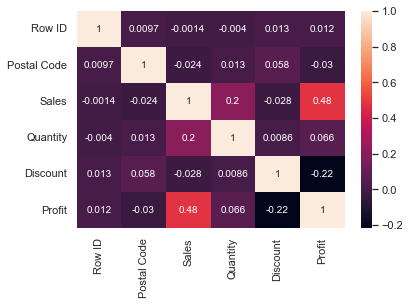

In [32]:
sns.heatmap(df.corr(), annot=True)

Per la mia colonna sales posso osservare una buona correlazione con le colonne "Profit", "Quantity" e una correlazione inversa (comprensibilmente) con "Discount". Diamole in pasto all'algoritmo di regressione lineare e vediamo se la performance migliora.

In [33]:
R = InputCopy(df)
X=R.loc[:,["Quantity","Discount","Profit"]]
y=R.loc[:,["Sales"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=22051996)
lr = LinearRegression().fit(X_train, y_train)

In [34]:
print('Punteggio r2 Regressione lineare, features con correlazione maggiore')
print(r2_score(y_test,lr.predict(X_test)))

Punteggio r2 Regressione lineare, features con correlazione maggiore
0.2679541815081472


Siamo andati a peggiorare ulteriormente la performance. Posso provare a scomporre la data di ordine in 3 differenti colonne, ed utilizzare l'algoritmo random forest (generalmente riconosciuto come più potente, e per il quale non sono necessari lavori importanti di preprocessing) per vedere se posso ottenere risultati migliori.

In [35]:
Ra = InputCopy(df)
Ra["Years"]=pd.DatetimeIndex(Ra['Order Date']).year
Ra["Month"]=pd.DatetimeIndex(Ra['Order Date']).month
Ra["Day"]=pd.DatetimeIndex(Ra['Order Date']).day
X=Ra.loc[:,["Years","Month","Day","Quantity","Discount","Profit"]]
y=Ra.loc[:,["Sales"]]


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=22051996)
rf_reg=RandomForestRegressor(n_estimators = 105,random_state=22051996)
rf_reg.fit(X_train,y_train.values.ravel())

RandomForestRegressor(n_estimators=105, random_state=22051996)

In [37]:
print('Punteggio r2 Random Forest')
print(r2_score(y_test,rf_reg.predict(X_test)))

Punteggio r2 Random Forest
0.7566875592164202


In [38]:
scores =[]
for k in range(90, 110):
    rfr = RandomForestRegressor(n_estimators=k, random_state=220596)
    rfr.fit(X_train, y_train.values.ravel())
    y_pred = rfr.predict(X_test)
    scores.append(r2_score(y_test, y_pred))


Text(0, 0.5, 'Punteggio R2')

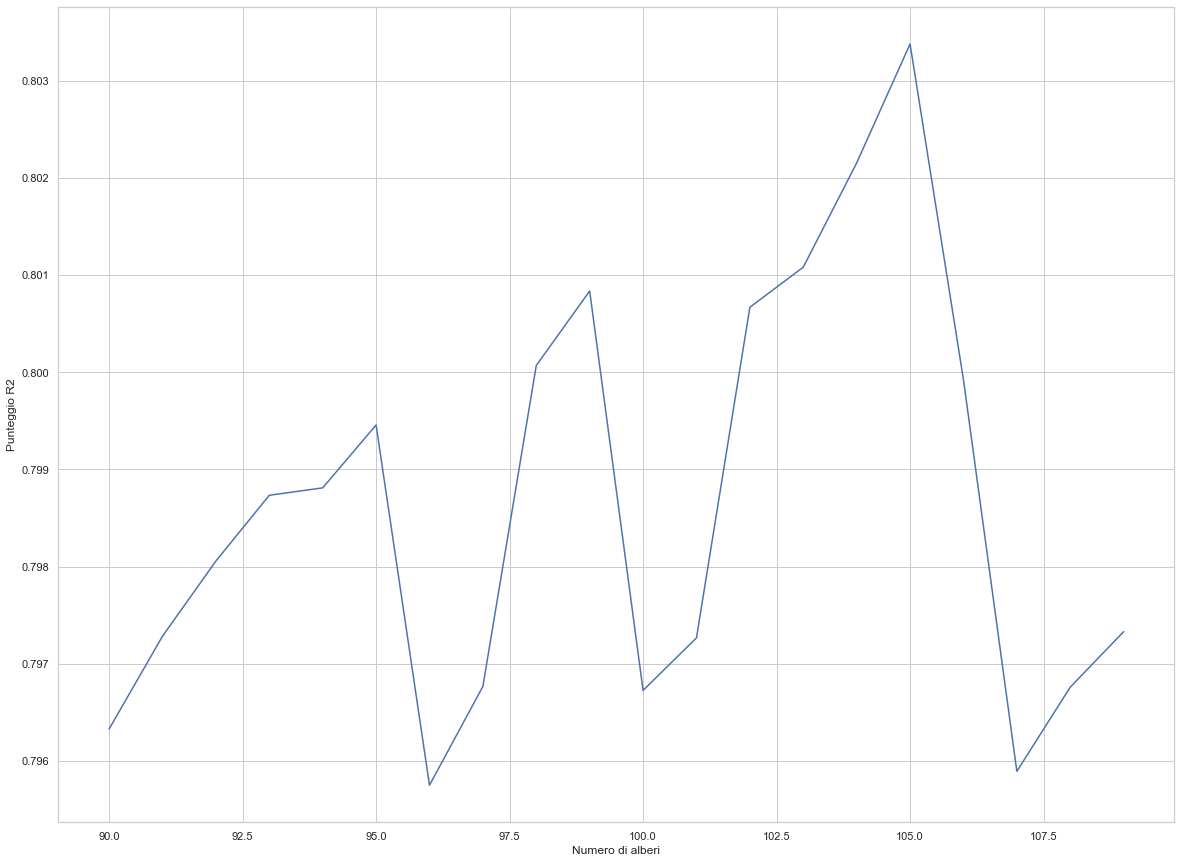

In [39]:
plt.figure(figsize=(20, 15))
plt.plot(range(90, 110), scores)
plt.xlabel('Numero di alberi')
plt.ylabel('Punteggio R2')